In [11]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("setting"))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("utils"))))
from utils import dataframeUtil
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np
from random import randrange

import setting

from utils import plotUtils

In [13]:
train_df = dataframeUtil.concatenateTowCSV("../"+setting.shiftUptrainDatasetName,"../"+setting.shiftDowntrainDatasetName,setting.targetColumName_shiftUp,setting.targetColumName_shiftDown)
test_df = dataframeUtil.concatenateTowCSV("../"+setting.shiftUptestDatasetName,"../"+setting.shiftDowntestDatasetName,setting.targetColumName_shiftUp,setting.targetColumName_shiftDown)


x = train_df.iloc[:,0:setting.neuralInputsNumber].values
y = train_df.iloc[:,setting.neuralInputsNumber:setting.neuralInputsNumber+2].values

test_x = test_df.iloc[:,0:setting.neuralInputsNumber].values
test_y = test_df.iloc[:,setting.neuralInputsNumber:setting.neuralInputsNumber+2].values

train_df.head()

d:\projekts\control-chart\utils\dataframeUtil.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = pd1.append(pd2, ignore_index=True)
d:\projekts\control-chart\utils\dataframeUtil.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = pd1.append(pd2, ignore_index=True)


x0        x1        x2        x3        x4        x5        x6  \
330  -0.081084 -0.458278  0.029060  0.517601 -1.939139 -0.283442  0.003093   
70    0.361497  1.463412  0.992081  0.722397  0.418720  1.393314  0.368532   
1173  0.770061 -0.006105  0.733704  0.651016 -0.181418 -0.812945  0.814904   
63   -0.155830  0.413070  0.206211  2.495364  1.519756  1.259912  1.418900   
938  -0.131300  0.434699  0.092536 -0.534739  0.078652  1.162515 -0.565030   

            x7        x8        x9  shiftUp  shiftDown  
330  -0.971075  0.295594 -0.037888      0.0        0.0  
70    1.025700  1.397211  0.762219      1.0        0.0  
1173  0.750747 -0.097527  0.481943      0.0        0.0  
63    0.169766  1.782686 -0.685877      1.0        0.0  
938  -0.068895  1.160739 -0.845320      0.0        0.0

In [41]:
neuralInputsNumber = setting.neuralInputsNumber
model = keras.Sequential([
	keras.layers.Dense(512, input_shape=(neuralInputsNumber,), activation='relu'),
	keras.layers.Dense(256, activation='relu'),
	keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation='relu'),
	keras.layers.Dropout(0.3),
	keras.layers.Dense(128, activation='relu'),
	keras.layers.Dropout(0.4),
	keras.layers.Dense(512, activation='relu'),
	#keras.layers.Dropout(0.4),
	keras.layers.Dense(2, activation='sigmoid')])

model.compile(optimizer='adam', 
	          loss=keras.losses.BinaryCrossentropy(from_logits=True),
	          metrics=['accuracy'])

model.fit(x, y, batch_size=32, epochs=20)

print("EVALUATION")
model.evaluate(test_x, test_y)

Epoch 1/20
38/38 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.7367
Epoch 2/20
38/38 [==============================] - 0s 2ms/step - loss: 0.1398 - accuracy: 0.7542
Epoch 3/20
38/38 [==============================] - 0s 2ms/step - loss: 0.1005 - accuracy: 0.7442
Epoch 4/20
38/38 [==============================] - 0s 2ms/step - loss: 0.0974 - accuracy: 0.7367
Epoch 5/20
38/38 [==============================] - 0s 2ms/step - loss: 0.0920 - accuracy: 0.7475
Epoch 6/20
38/38 [==============================] - 0s 2ms/step - loss: 0.1008 - accuracy: 0.8450
Epoch 7/20
38/38 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.7825
Epoch 8/20
38/38 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.7033
Epoch 9/20
38/38 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.7158
Epoch 10/20
38/38 [==============================] - 0s 2ms/step - loss: 0.0590 - accuracy: 0.7642
Epoch 11/20
38/38 [

[0.11029624938964844, 0.9141666889190674]

In [29]:

print("EVALUATION")
model.evaluate(test_x, test_y)

EVALUATION
4/4 [==============================] - 0s 855us/step - loss: 2.4499e-04 - accuracy: 1.0000


[0.0002449873136356473, 1.0]

Prediction [[1.]]


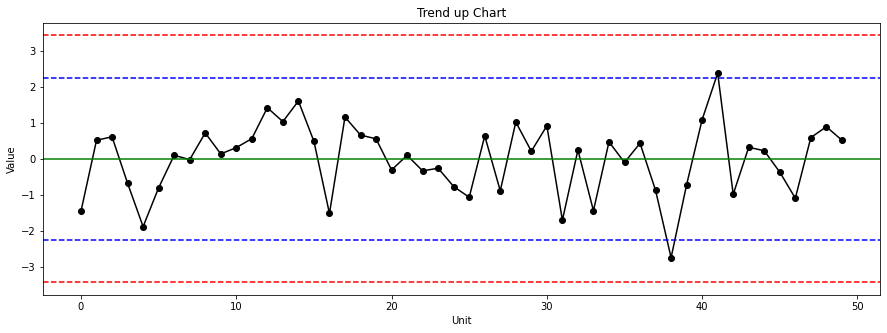

In [32]:
dataRow = dataframeUtil.getRandomChartFrom_csv("../"+setting.shiftUptrainDatasetName,setting.trendUpChartPlotTitle,-1)
#print("Prediction for", dataRow)
prediction = np.round(model.predict(dataRow))
print("Prediction", np.round(prediction))